In [1]:
import pandas as pd
import numpy as np
import gensim
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import seaborn as sns
import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [2]:
df=pd.read_csv('Base_Model_Final.csv') #target=likes_x

In [4]:
df.head()

,Unnamed: 0,caption,following,likes_x,posts_count,followers,Hod,mon,tue,wed,...,average_five_recent_likes,TextBlob_Analysis,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,hashtag_popularity
0,0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,10,1,0,0,...,13.0,2,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,NaN,0,"['⏱', '📄', '🧑🏻\u200d⚕️', '👨\u200d👩\u200d👧\u200...",'stopwatch' 'page facing up' 'health worker: l...,10,3219.750000
1,1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 We grateful kind words feedback rec...,964.0,12.0,47.0,1093.0,14,0,0,0,...,13.0,2,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,NaN,0,"['👏', '🧡']",'clapping hands' 'orange heart',2,5178.333333
2,2,Hand dived Isle Jura scallop smoked roe leek c...,308.0,100.0,343.0,4202.0,17,0,0,0,...,158.6,1,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,NaN,0,[],NaN,0,17663.680000
3,3,Jerusalem Artichoke prepared first dessert mal...,308.0,81.0,343.0,4202.0,20,1,0,0,...,158.6,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,NaN,0,[],NaN,0,16841.857143
4,4,Main course seasonal course menu: Borders Roe...,308.0,146.0,343.0,4202.0,18,0,0,1,...,158.6,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],NaN,0,16841.857143


##caption

In [85]:
import multiprocessing
from gensim.models import Doc2Vec
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing 

sentences = [TaggedDocument(token, 'tag') for token in tokenized_caption]

d2v_model = Doc2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

d2v_model.build_vocab(sentences)


/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
INFO - 15:35:23: collecting all words and their counts
INFO - 15:35:23: PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO - 15:35:23: collected 6718 word types and 3 unique tags from a corpus of 1000 examples and 22620 words
INFO - 15:35:23: Loading a fresh vocabulary
INFO - 15:35:23: effective_min_count=20 retains 161 unique words (2% of original 6718, drops 6557)
INFO - 15:35:23: effective_min_count=20 leaves 6258 word corpus (27% of original 22620, drops 16362)
INFO - 15:35:23: deleting the raw counts dictionary of 6718 items
INFO - 15:35:23: sample=6e-05 downsamples 161 most-common words
INFO - 15:35:23: downsampling leaves estimated 651 word corpus (10.4% of prior 6258)
INFO - 15:3

In [71]:
sentences[0:4]

[TaggedDocument(words=['𝗗𝗶𝗱', '𝘆𝗼𝘂', '𝗸𝗻𝗼𝘄', '𝘁𝗵𝗮𝘁', '𝘆𝗼𝘂', '𝗰𝗮𝗻', '𝘁𝗲𝘀𝘁', '𝗳𝗼𝗿', '𝗖𝗼𝘃𝗶𝗱', '𝘄𝗶𝘁𝗵', '𝗿𝗲𝘀𝘂𝗹𝘁𝘀', '𝗶𝗻', '𝗷𝘂𝘀𝘁', '𝟭𝟱', '𝗺𝗶𝗻𝘂𝘁𝗲', '\u200d', 'This', 'possible', 'thanks', '𝗟𝗮𝘁𝗲𝗿𝗮𝗹', '𝗙𝗹𝗼𝘄', '𝗔𝗻𝘁𝗶𝗴𝗲𝗻', '𝗧𝗲𝘀𝘁𝗶𝗻𝗴', 'Lateral', 'flow', 'testing', 'fast', 'simple', 'way', 'test', 'people', 'symptoms', 'COVID-', 'may', 'still', 'spreading', 'virus', 'The', 'tests', 'easy', 'use', 'give', 'results', 'within', 'minutes', 'The', 'antigen', 'test', 'perfect', 'solution', 'if:', 'You', 'plan', 'visit', 'family', '\u200d\u200d\u200d', 'You', 'plan', 'visit', 'friend', 'You', 'need', 'meet', 'colleagues', '\u200d', 'You', 'want', 'test', 'regularly', 'make', 'sure', 'protect', 'loved', 'ones', 'You', 'important', 'occasion', 'forced', 'attend', 'You', 'want', 'know', 'whether', 'virus', 'Protect', 'others', 'around', 'For', 'information', 'DM', 'us'], tags='tag'),
 TaggedDocument(words=['𝗧𝗛𝗔𝗡𝗞', '𝗬𝗢𝗨', 'We', 'grateful', 'kind', 'words', 'feedback', 'receiving', 'since', 'started', 'providin

In [86]:
d2v_model.train(sentences, total_examples= len(df['caption']), epochs=20)


INFO - 15:35:28: training model with 1 workers on 161 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 15:35:29: worker thread finished; awaiting finish of 0 more threads
INFO - 15:35:29: EPOCH - 1 : training on 22620 raw words (3665 effective words) took 0.0s, 88186 effective words/s
INFO - 15:35:29: worker thread finished; awaiting finish of 0 more threads
INFO - 15:35:29: EPOCH - 2 : training on 22620 raw words (3672 effective words) took 0.0s, 81713 effective words/s
INFO - 15:35:29: worker thread finished; awaiting finish of 0 more threads
INFO - 15:35:29: EPOCH - 3 : training on 22620 raw words (3639 effective words) took 0.0s, 88089 effective words/s
INFO - 15:35:29: worker thread finished; awaiting finish of 0 more threads
INFO - 15:35:29: EPOCH - 4 : training on 22620 raw words (3658 effective words) took 0.0s, 91147 effective words/s
INFO - 15:35:29: worker thread finished; awaiting finish of 0 more threads
INFO - 15:35:29: EPOCH - 5 : tra

In [66]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += d2v_model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [87]:
doc2vec_Arrays = np.zeros((len(tokenized_caption), 300)) 
for i in range(len(tokenized_caption)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_caption[i], 300)
d2v_df_cap = pd.DataFrame(doc2vec_Arrays)
d2v_df_cap.shape

(1000, 300)

##hashtags

In [80]:

tokenized_hash = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing 

sentences = [TaggedDocument(token, 'tag') for token in tokenized_hash]

d2v_model = Doc2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

d2v_model.build_vocab(sentences)


/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
INFO - 15:34:38: collecting all words and their counts
INFO - 15:34:38: PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO - 15:34:38: collected 1373 word types and 3 unique tags from a corpus of 1000 examples and 7062 words
INFO - 15:34:38: Loading a fresh vocabulary
INFO - 15:34:38: effective_min_count=20 retains 96 unique words (6% of original 1373, drops 1277)
INFO - 15:34:38: effective_min_count=20 leaves 4545 word corpus (64% of original 7062, drops 2517)
INFO - 15:34:38: deleting the raw counts dictionary of 1373 items
INFO - 15:34:38: sample=6e-05 downsamples 96 most-common words
INFO - 15:34:38: downsampling leaves estimated 352 word corpus (7.7% of prior 4545)
INFO - 15:34:38: 

In [81]:
d2v_model.train(sentences, total_examples= len(df['hashtags']), epochs=20)


INFO - 15:34:43: training model with 1 workers on 96 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 15:34:43: worker thread finished; awaiting finish of 0 more threads
INFO - 15:34:43: EPOCH - 1 : training on 7062 raw words (3340 effective words) took 0.0s, 78092 effective words/s
INFO - 15:34:43: worker thread finished; awaiting finish of 0 more threads
INFO - 15:34:43: EPOCH - 2 : training on 7062 raw words (3339 effective words) took 0.0s, 89571 effective words/s
INFO - 15:34:43: worker thread finished; awaiting finish of 0 more threads
INFO - 15:34:43: EPOCH - 3 : training on 7062 raw words (3327 effective words) took 0.0s, 94848 effective words/s
INFO - 15:34:43: worker thread finished; awaiting finish of 0 more threads
INFO - 15:34:43: EPOCH - 4 : training on 7062 raw words (3384 effective words) took 0.0s, 100884 effective words/s
INFO - 15:34:43: worker thread finished; awaiting finish of 0 more threads
INFO - 15:34:43: EPOCH - 5 : trainin

In [82]:
doc2vec_Arrays = np.zeros((len(tokenized_hash), 300)) 
for i in range(len(tokenized_hash)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_hash[i], 300)
d2v_df_hash = pd.DataFrame(doc2vec_Arrays)
d2v_df_hash.shape

(1000, 300)

##mentions

In [83]:

tokenized_ment = df['mentions'].apply(lambda x: str(x).split()) # tokenizing 

sentences = [TaggedDocument(token, 'tag') for token in tokenized_ment]

d2v_model = Doc2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

d2v_model.build_vocab(sentences)

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
INFO - 15:34:59: collecting all words and their counts
INFO - 15:34:59: PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO - 15:34:59: collected 343 word types and 3 unique tags from a corpus of 1000 examples and 1209 words
INFO - 15:34:59: Loading a fresh vocabulary
INFO - 15:34:59: effective_min_count=20 retains 1 unique words (0% of original 343, drops 342)
INFO - 15:34:59: effective_min_count=20 leaves 675 word corpus (55% of original 1209, drops 534)
INFO - 15:34:59: deleting the raw counts dictionary of 343 items
INFO - 15:34:59: sample=6e-05 downsamples 1 most-common words
INFO - 15:34:59: downsampling leaves estimated 5 word corpus (0.8% of prior 675)
INFO - 15:34:59: estimated r

In [78]:
d2v_model.train(sentences, total_examples= len(df['mentions']), epochs=20)


INFO - 15:34:05: training model with 1 workers on 1 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 15:34:05: worker thread finished; awaiting finish of 0 more threads
INFO - 15:34:05: EPOCH - 1 : training on 1209 raw words (3004 effective words) took 0.1s, 53661 effective words/s
INFO - 15:34:06: worker thread finished; awaiting finish of 0 more threads
INFO - 15:34:06: EPOCH - 2 : training on 1209 raw words (3003 effective words) took 0.1s, 40424 effective words/s
INFO - 15:34:06: worker thread finished; awaiting finish of 0 more threads
INFO - 15:34:06: EPOCH - 3 : training on 1209 raw words (3007 effective words) took 0.1s, 49453 effective words/s
INFO - 15:34:06: worker thread finished; awaiting finish of 0 more threads
INFO - 15:34:06: EPOCH - 4 : training on 1209 raw words (3007 effective words) took 0.1s, 59097 effective words/s
INFO - 15:34:06: worker thread finished; awaiting finish of 0 more threads
INFO - 15:34:06: EPOCH - 5 : training 

In [84]:
doc2vec_Arrays = np.zeros((len(tokenized_ment), 300)) 
for i in range(len(tokenized_ment)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_ment[i], 300)
d2v_df_ment = pd.DataFrame(doc2vec_Arrays)
d2v_df_ment.shape

(1000, 300)

##emojis text

In [88]:

tokenized_emo = df['emoji_text'].apply(lambda x: str(x).split()) # tokenizing 

sentences = [TaggedDocument(token, 'tag') for token in tokenized_emo]

d2v_model = Doc2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

d2v_model.build_vocab(sentences)

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
INFO - 15:36:04: collecting all words and their counts
INFO - 15:36:04: PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO - 15:36:04: collected 452 word types and 3 unique tags from a corpus of 1000 examples and 4162 words
INFO - 15:36:04: Loading a fresh vocabulary
INFO - 15:36:04: effective_min_count=20 retains 42 unique words (9% of original 452, drops 410)
INFO - 15:36:04: effective_min_count=20 leaves 2522 word corpus (60% of original 4162, drops 1640)
INFO - 15:36:04: deleting the raw counts dictionary of 452 items
INFO - 15:36:04: sample=6e-05 downsamples 42 most-common words
INFO - 15:36:04: downsampling leaves estimated 125 word corpus (5.0% of prior 2522)
INFO - 15:36:04: esti

In [89]:
d2v_model.train(sentences, total_examples= len(df['emoji_text']), epochs=20)


INFO - 15:36:20: training model with 1 workers on 42 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 15:36:20: worker thread finished; awaiting finish of 0 more threads
INFO - 15:36:20: EPOCH - 1 : training on 4162 raw words (3103 effective words) took 0.1s, 45645 effective words/s
INFO - 15:36:20: worker thread finished; awaiting finish of 0 more threads
INFO - 15:36:20: EPOCH - 2 : training on 4162 raw words (3119 effective words) took 0.1s, 52893 effective words/s
INFO - 15:36:20: worker thread finished; awaiting finish of 0 more threads
INFO - 15:36:20: EPOCH - 3 : training on 4162 raw words (3116 effective words) took 0.1s, 48388 effective words/s
INFO - 15:36:20: worker thread finished; awaiting finish of 0 more threads
INFO - 15:36:20: EPOCH - 4 : training on 4162 raw words (3147 effective words) took 0.1s, 50911 effective words/s
INFO - 15:36:20: worker thread finished; awaiting finish of 0 more threads
INFO - 15:36:20: EPOCH - 5 : training

In [90]:
doc2vec_Arrays = np.zeros((len(tokenized_emo), 300)) 
for i in range(len(tokenized_emo)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_emo[i], 300)
d2v_df_emo = pd.DataFrame(doc2vec_Arrays)
d2v_df_emo.shape

(1000, 300)

In [91]:
d2v_Df = pd.DataFrame(np.hstack((d2v_df_cap,d2v_df_hash,d2v_df_ment,d2v_df_emo, df)))

In [ ]:
for col in d2v_Df.columns:
  print(type(col))

In [ ]:
d2v_Df.head()

In [ ]:
dropped = [1201,1217,1217,1219,1221,1222]
d2v_df = d2v_Df.drop(dropped,axis=1)
d2v_df

In [99]:
from sklearn import preprocessing
df = pd.DataFrame(d2v_df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)





In [102]:
y = d2v_df[1203]          #Target Variable
X = d2v_df.drop(1202,1)   #Feature Matrix
X=pd.DataFrame(X)
y=pd.DataFrame(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


 It seems like new version of xgboost do not accept the datatype of Object. So they should be converted to numeric

In [104]:
for i in X.columns:
  X[i]=pd.to_numeric(X[i])

In [105]:
for i in y.columns:
  y[i]=pd.to_numeric(y[i])

In [106]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [107]:
print(x_train.dtypes)

0       float64
1       float64
2       float64
3       float64
4       float64
         ...   
1216      int64
1218      int64
1220      int64
1223      int64
1224    float64
Length: 1219, dtype: object


#XGBoost

In [108]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


model = xgb.XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

model_grid = GridSearchCV(model,parameters,cv = 2,n_jobs = 5, verbose=True)

model_grid.fit(x_train, y_train)

model_grid.best_score_
model_grid.best_params_

Fitting 2 folds for each of 9 candidates, totalling 18 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [109]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,silent=1,subsample=0.7)


In [110]:
xg_reg.fit(x_train, y_train)
y_pred = xg_reg.predict(x_test)

In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

R2=r2_score(y_test,y_pred)
print("R2 Score: %f" % (R2))
print()

RMSE: 34.647125
R2 Score: 0.986748



In [112]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(20,20))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

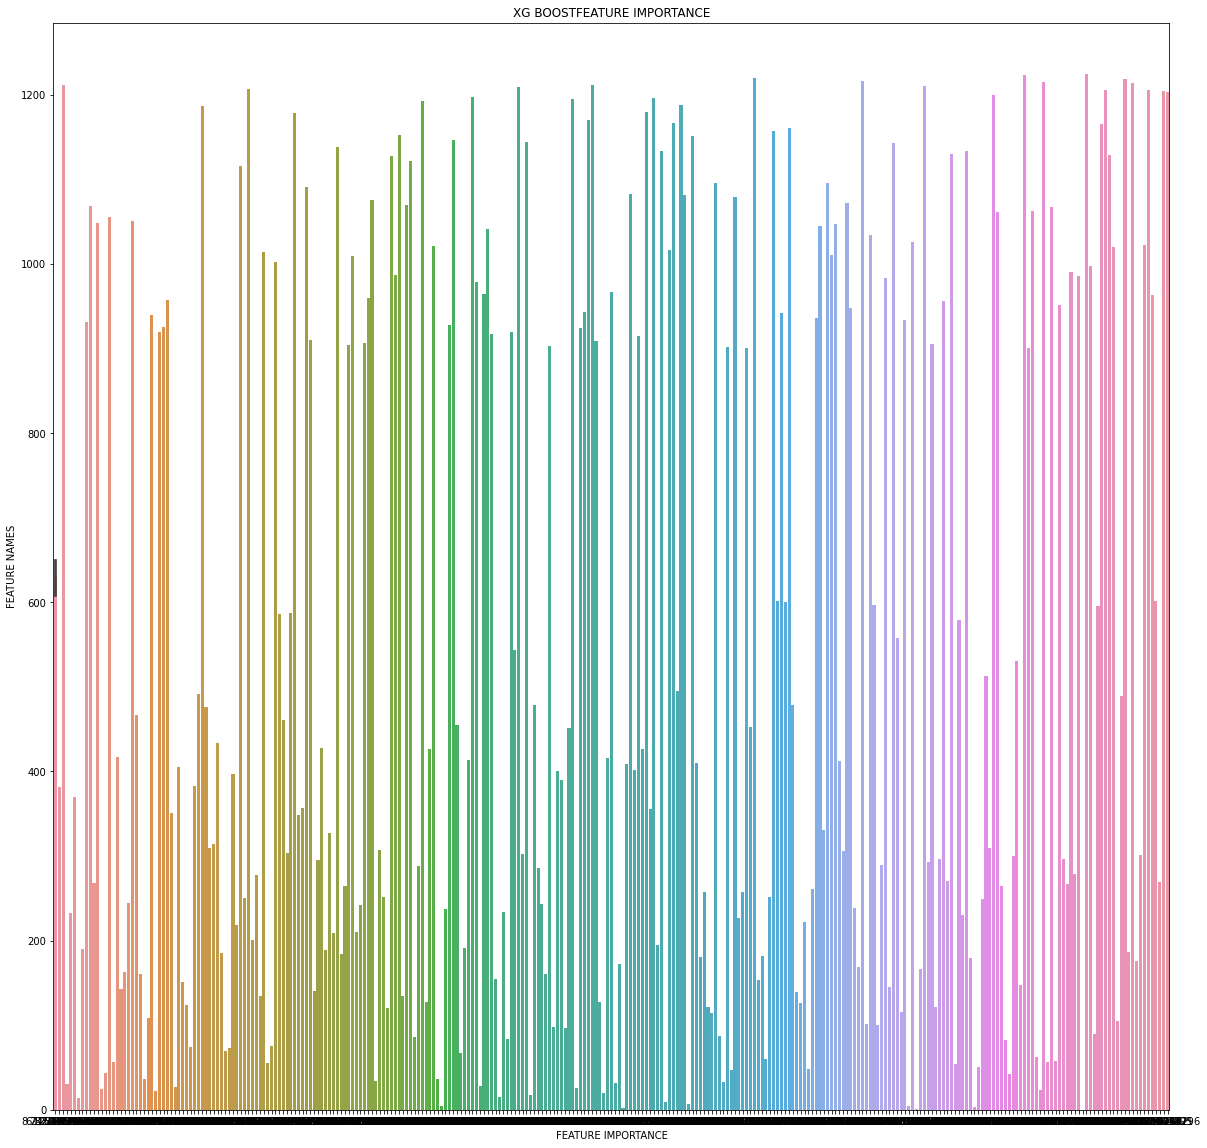

In [113]:
plot_feature_importance(xg_reg.feature_importances_,x_train.columns,'XG BOOST')

#Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


model_rand = RandomForestRegressor()


n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = model_rand,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(x_train, y_train)

# model_rand.best_score_
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 5, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}  



In [115]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 5, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}  



In [119]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=5, min_samples_split=6 , min_samples_leaf=3, max_features='auto',max_depth=40,bootstrap=False)
rnd_clf.fit(x_train, y_train)
y_pred_rnd_clf = rnd_clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [120]:
y_pred_rnd_clf.shape

(200,)

In [121]:
mse=mean_squared_error(y_test, y_pred_rnd_clf)
print('MSE: %f' % (mse))
rmse_rnd = np.sqrt(mse)
print("RMSE: %f" % (rmse_rnd))

R2_rnd=r2_score(y_test,y_pred_rnd_clf)
print("R2 Score: %f" % (R2_rnd))


MSE: 80.153724
RMSE: 8.952861
R2 Score: 0.999115


#SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)


# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [130]:
svc_clf=SVC(C=1, gamma=0.001, kernel='rbf')
svc_clf.fit(x_train, y_train)
grid_predictions = grid.predict(x_test)
 
mse=mean_squared_error(y_test, grid_predictions)
print('MSE: %f' % (mse))
rmse_rnd = np.sqrt(mse)
print("RMSE: %f" % (rmse_rnd))

R2_rnd=r2_score(y_test, grid_predictions)
print("R2 Score: %f" % (R2_rnd))

MSE: 132297.850000
RMSE: 363.727714
R2 Score: -0.460506
